In [1]:
import time
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft
import pandas as pd
import seaborn as sns
import math
import sys
import os
#from sabreMod import sosf,sosfh
from scipy import interpolate

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="20"

In [2]:
start=time.time()

In [3]:
orion=pd.read_table('Obs/Orion.csv', delimiter=',')
orion.describe()

,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,...,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,-0.133333,0.300000,0.366667,0.095833,0.525000,0.062500,-0.700000,-0.295833,0.141667,-0.279167,...,-1.654167,-2.845833,-1.891667,-1.308333,-0.825000,-1.041667,-0.633333,-0.166667,0.229167,0.450000
std,0.814898,1.298494,0.995497,1.257492,1.217713,1.553905,2.062291,3.833092,2.790343,2.699272,...,3.067640,2.998692,2.519647,2.137230,2.639376,1.916500,1.313034,0.755079,0.859464,1.595919
min,-3.900000,-2.500000,0.000000,-3.500000,-1.000000,-2.900000,-4.500000,-7.000000,-3.100000,-3.900000,...,-7.400000,-9.100000,-6.400000,-6.000000,-6.100000,-5.100000,-4.600000,-3.700000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,-0.600000,-2.325000,-2.550000,-2.325000,-2.100000,...,-3.150000,-5.000000,-4.725000,-2.625000,-2.200000,-1.925000,-0.175000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.400000,-0.300000,-0.050000,...,-1.900000,-2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.200000,0.925000,0.000000,0.000000,0.125000,1.000000,0.125000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.700000,4.300000,4.600000,3.200000,3.900000,5.100000,3.800000,10.400000,6.900000,8.900000,...,6.800000,1.900000,1.400000,3.100000,7.400000,1.400000,0.500000,0.000000,4.000000,7.000000


In [4]:
orion

,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.6,4.9,8.9,...,6.8,0.0,0.0,0.0,7.4,0.0,0.0,0.0,0.0,7.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.9,0.0,...,0.0,1.9,0.0,3.1,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.4,4.1,2.5,...,-0.4,-1.8,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.2,2.5,...,0.0,-2.9,-2.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,2.5,4.2,2.8,2.2,...,-2.6,-3.5,0.0,-2.4,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,3.1,0.0,2.8,1.9,-0.1,...,-1.8,-4.8,-5.2,0.0,-3.6,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,2.3,2.2,3.8,3.2,0.7,1.4,...,-5.9,-9.1,-4.8,-6.0,0.0,-4.5,-3.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,1.6,5.1,3.0,0.0,-0.9,-0.2,...,0.0,-6.3,-4.7,-4.4,-4.4,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,1.4,2.2,0.0,-4.5,0.0,-1.6,0.0,...,-3.0,-5.6,-5.6,-1.1,-2.2,0.0,-4.6,0.0,0.0,0.0


In [6]:
orion[orion == 0] = np.nan 
orion

,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.6,4.9,8.9,...,6.8,NaN,NaN,NaN,7.4,NaN,NaN,NaN,NaN,7.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.9,NaN,...,NaN,1.9,NaN,3.1,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.4,4.1,2.5,...,-0.4,-1.8,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.2,2.5,...,NaN,-2.9,-2.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,2.5,4.2,2.8,2.2,...,-2.6,-3.5,NaN,-2.4,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,3.1,NaN,2.8,1.9,-0.1,...,-1.8,-4.8,-5.2,NaN,-3.6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,2.3,2.2,3.8,3.2,0.7,1.4,...,-5.9,-9.1,-4.8,-6.0,NaN,-4.5,-3.0,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,1.6,5.1,3.0,NaN,-0.9,-0.2,...,NaN,-6.3,-4.7,-4.4,-4.4,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,1.4,2.2,NaN,-4.5,NaN,-1.6,NaN,...,-3.0,-5.6,-5.6,-1.1,-2.2,NaN,-4.6,NaN,NaN,NaN


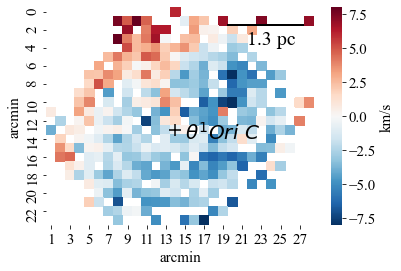

In [75]:
fig, ax = plt.subplots()
sns.heatmap(orion,cmap='RdBu_r', vmin=-8, vmax=8, cbar_kws={'label': 'km/s'})
plt.scatter(13.5, 13.5, marker='+', color='k', s=150)
ax.set(xlabel='arcmin', ylabel='arcmin')

ax.text(0.93, 0.81, '1.3 pc',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=20)
    
plt.axhline(y=2, xmin=0.68, xmax=0.96, linewidth=2, color = 'k')

plt.text(14.5, 14.5, '$θ^{1}Ori\ C$', fontsize=20, color='k')

plt.show()

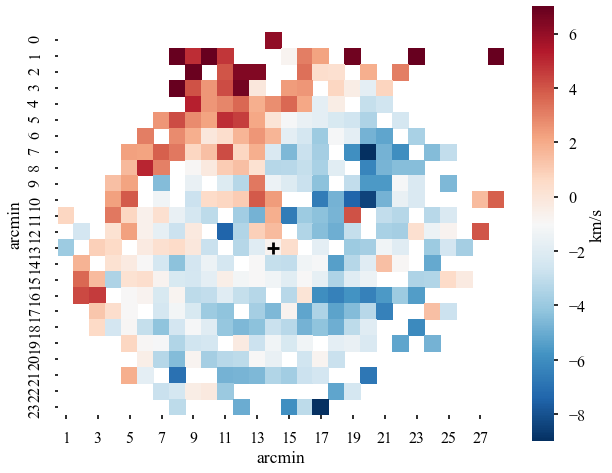

In [82]:
plt.style.use([
    "seaborn-poster",
])
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(orion,cmap='RdBu_r', vmin=-9, vmax=7, cbar_kws={'label': 'km/s'})
plt.scatter(13.5, 13.5, marker='+', color='k', s=150)
ax.set(xlabel='arcmin', ylabel='arcmin')
ax.set_aspect("equal")
plt.show()

In [8]:
df=orion.stack().reset_index().rename(columns={'level_0':'RAdeg', 'level_1':'DEdeg', 0:'RVHalpha'})
#df.describe()
df

,RAdeg,DEdeg,RVHalpha
0,0,14,6.1
1,1,8,7.6
2,1,9,4.9
3,1,10,8.9
4,1,11,4.7
...,...,...,...
354,23,8,-3.1
355,23,12,-5.0
356,23,15,-5.9
357,23,16,-3.1


In [9]:
df.RAdeg=1.0*df.RAdeg

In [10]:
df.DEdeg=pd.to_numeric(df.DEdeg)*1.0

In [11]:
df

,RAdeg,DEdeg,RVHalpha
0,0.0,14.0,6.1
1,1.0,8.0,7.6
2,1.0,9.0,4.9
3,1.0,10.0,8.9
4,1.0,11.0,4.7
...,...,...,...
354,23.0,8.0,-3.1
355,23.0,12.0,-5.0
356,23.0,15.0,-5.9
357,23.0,16.0,-3.1


Structure Function

In [12]:
df0 = pd.DataFrame({'X': df.RAdeg, 'Y': df.DEdeg, 'RV': df.RVHalpha})
df0.describe()

,X,Y,RV
count,359.000000,359.000000,359.000000
mean,11.896936,13.788301,-1.250139
std,5.747768,6.068950,3.230147
min,0.000000,1.000000,-10.100000
25%,7.000000,9.000000,-3.400000
50%,12.000000,14.000000,-1.800000
75%,16.000000,18.000000,0.700000
max,23.000000,28.000000,10.400000


In [9]:
df0["RV"] = df0["RV"].replace(['0', 0], np.nan)

In [14]:
df0.describe()

,X,Y,RV
count,359.000000,359.000000,359.000000
mean,11.896936,13.788301,-1.250139
std,5.747768,6.068950,3.230147
min,0.000000,1.000000,-10.100000
25%,7.000000,9.000000,-3.400000
50%,12.000000,14.000000,-1.800000
75%,16.000000,18.000000,0.700000
max,23.000000,28.000000,10.400000


In [15]:
data=df0

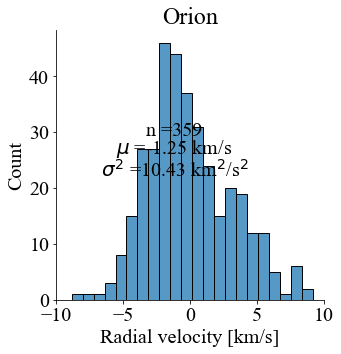

In [16]:
#fig, ax = plt.subplots()

sns.displot(data.RV-data.RV.mean(),bins=25)
plt.xlim(-10,10)

plt.text(0.45, 0.86,'n ='+str(data.RV.count()), ha='center', va='center', transform=ax.transAxes, color='k')
plt.text(0.45, 0.78,'$μ$ ='+str(np.round(data.RV.mean(),2))+' km/s', ha='center', va='center', transform=ax.transAxes, color='k')
plt.text(0.45, 0.68,'$σ^{2}$ ='+str(np.round(data.RV.var(),2))+' km$^{2}$/s$^{2}$', ha='center', va='center', transform=ax.transAxes, color='k')

plt.title('Orion')

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"

plt.xlabel('Radial velocity [km/s]')
plt.savefig('Hist//Orion.pdf', bbox_inches='tight')

Dr. Will

In [17]:
df1 = pd.DataFrame({'RA': df.RAdeg, 'DE': df.DEdeg, 'V': df.RVHalpha, '_key': 1})
df1.describe()

,RA,DE,V,_key
count,359.000000,359.000000,359.000000,359.0
mean,11.896936,13.788301,-1.250139,1.0
std,5.747768,6.068950,3.230147,0.0
min,0.000000,1.000000,-10.100000,1.0
25%,7.000000,9.000000,-3.400000,1.0
50%,12.000000,14.000000,-1.800000,1.0
75%,16.000000,18.000000,0.700000,1.0
max,23.000000,28.000000,10.400000,1.0


In [18]:
df2 = df1.copy()

In [58]:
pairs = pd.merge(df1, df2, on='_key', suffixes=('', '_')).drop('_key', 1)
pairs.index = pd.MultiIndex.from_product((df1.index, df2.index))

pairs.head()

RA    DE    V  RA_   DE_   V_
0 0  0.0  14.0  6.1  0.0  14.0  6.1
  1  0.0  14.0  6.1  1.0   8.0  7.6
  2  0.0  14.0  6.1  1.0   9.0  4.9
  3  0.0  14.0  6.1  1.0  10.0  8.9
  4  0.0  14.0  6.1  1.0  11.0  4.7

In [59]:
pairs.loc[:, 'dDE'] =(pairs.DE - pairs.DE_)
pairs.loc[:, 'dRA'] =(pairs.RA - pairs.RA_)*np.cos(np.radians(0.5*(pairs.DE + pairs.DE_)))
#pairs.loc[:, 's'] = np.log10(np.hypot(pairs.dRA, pairs.dDE))
pairs.loc[:, 's'] = np.hypot(pairs.dRA, pairs.dDE)
pairs.loc[:, 'log_s'] = np.log10(pairs.s)
pairs.loc[:, 'dV'] = pairs.V - pairs.V_
pairs.loc[:, 'dV2'] = pairs.dV**2
pairs.loc[:, 'log_dV2'] = np.log10(pairs.dV**2)
pairs.loc[:, 'VV_mean'] = 0.5*(pairs.V + pairs.V_)

/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [60]:
#pairs = pairs[(pairs.dDE > 0.0)]
pairs = pairs[(pairs.dRA > 0.0)]
pairs.head()

,,RA,DE,V,RA_,DE_,V_,dDE,dRA,s,log_s,dV,dV2,log_dV2,VV_mean
1,0,1.0,8.0,7.6,0.0,14.0,6.1,-6.0,0.981627,6.079769,0.783887,1.5,2.25,0.352183,6.85
2,0,1.0,9.0,4.9,0.0,14.0,6.1,-5.0,0.979925,5.095120,0.707154,-1.2,1.44,0.158362,5.50
3,0,1.0,10.0,8.9,0.0,14.0,6.1,-4.0,0.978148,4.117860,0.614672,2.8,7.84,0.894316,7.50
4,0,1.0,11.0,4.7,0.0,14.0,6.1,-3.0,0.976296,3.154862,0.498980,-1.4,1.96,0.292256,5.40
5,0,1.0,15.0,-0.8,0.0,14.0,6.1,1.0,0.968148,1.391873,0.143600,-6.9,47.61,1.677698,2.65


In [61]:
pairs.describe()

,RA,DE,V,RA_,DE_,V_,dDE,dRA,s,log_s,dV,dV2,log_dV2,VV_mean
count,61390.000000,61390.000000,61390.000000,61390.000000,61390.000000,61390.000000,61390.000000,61390.000000,61390.000000,61390.000000,61390.000000,61390.000000,6.139000e+04,61390.000000
mean,15.348770,13.310881,-2.175387,8.421844,14.267796,-0.306392,-0.956915,6.710206,10.661293,0.967781,-1.868995,21.189685,-inf,-1.240889
std,4.500283,6.134191,2.537810,4.733588,5.926265,3.571316,8.507547,4.464133,4.958340,0.250736,4.206760,31.103930,NaN,2.274463
min,1.000000,1.000000,-10.100000,0.000000,1.000000,-9.100000,-27.000000,0.894934,0.906308,-0.042724,-20.500000,0.000000,-inf,-9.600000
25%,12.000000,8.000000,-3.800000,5.000000,10.000000,-3.000000,-7.000000,2.928888,6.883067,0.837782,-4.700000,1.960000,2.922561e-01,-2.850000
50%,16.000000,13.000000,-2.400000,8.000000,14.000000,-0.800000,-1.000000,5.846220,10.415050,1.017661,-1.700000,9.000000,9.542425e-01,-1.400000
75%,19.000000,18.000000,-0.800000,12.000000,19.000000,2.300000,5.000000,9.702957,14.204762,1.152434,1.000000,28.090000,1.448552e+00,0.200000
max,23.000000,28.000000,10.400000,22.000000,28.000000,10.400000,26.000000,22.577425,29.945519,1.476332,14.200000,420.250000,2.623508e+00,9.650000


In [62]:
pairs.corr()

,RA,DE,V,RA_,DE_,V_,dDE,dRA,s,log_s,dV,dV2,log_dV2,VV_mean
RA,1.000000,-0.112451,-0.316953,0.504112,-0.048556,-0.246131,-0.047257,0.461302,0.310836,0.302817,0.017744,-0.091351,-0.092468,-0.370060
DE,-0.112451,1.000000,-0.379812,-0.057347,0.005097,0.025909,0.717479,-0.069911,-0.095934,-0.070331,-0.251124,0.136687,0.092668,-0.191553
V,-0.316953,-0.379812,1.000000,-0.157540,0.016102,0.082638,-0.285072,-0.141422,-0.002721,-0.028544,0.533114,-0.248498,-0.142267,0.622770
RA_,0.504112,-0.057347,-0.157540,1.000000,-0.094789,-0.516625,0.024680,-0.533231,-0.307197,-0.296584,0.343548,-0.350241,-0.284544,-0.493488
DE_,-0.048556,0.005097,0.016102,-0.094789,1.000000,-0.358676,-0.692914,0.032540,0.124241,0.095176,0.314210,-0.114281,-0.120840,-0.272610
V_,-0.246131,0.025909,0.082638,-0.516625,-0.358676,1.000000,0.268531,0.296747,0.185490,0.165306,-0.799094,0.532690,0.411664,0.831193
dDE,-0.047257,0.717479,-0.285072,0.024680,-0.692914,0.268531,1.000000,-0.073074,-0.155716,-0.117009,-0.399944,0.178162,0.150915,0.051782
dRA,0.461302,-0.069911,-0.141422,-0.533231,0.032540,0.296747,-0.073074,1.000000,0.620282,0.601364,-0.337237,0.270621,0.203398,0.154075
s,0.310836,-0.095934,-0.002721,-0.307197,0.124241,0.185490,-0.155716,0.620282,1.000000,0.941046,-0.159112,0.251688,0.216340,0.144109
log_s,0.302817,-0.070331,-0.028544,-0.296584,0.095176,0.165306,-0.117009,0.601364,0.941046,1.000000,-0.157556,0.232809,0.210814,0.113855


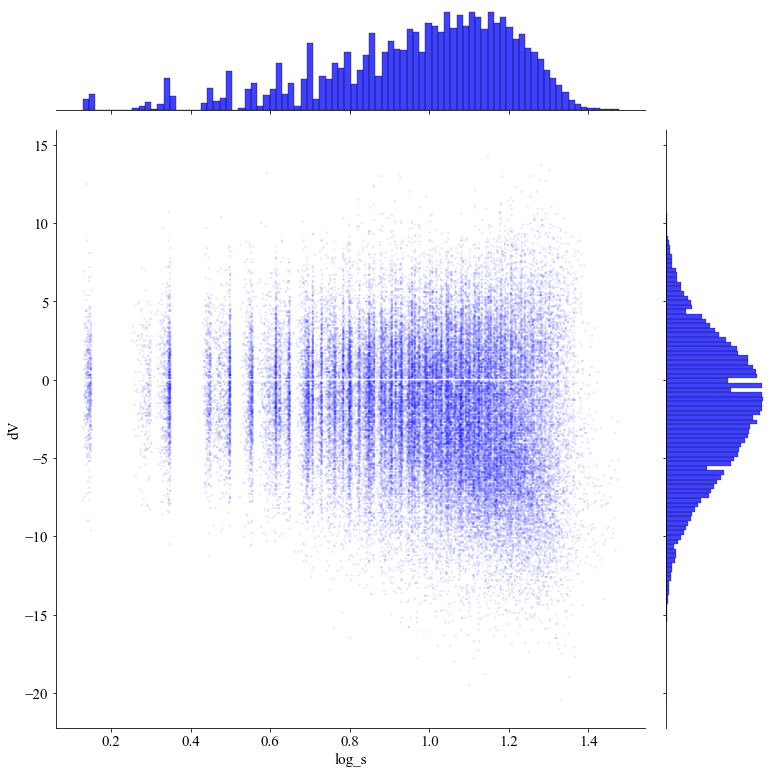

In [63]:
mask = (pairs.log_s > 0) & (pairs.log_dV2 > -4)
ax = sns.jointplot(x='log_s', y='dV', data=pairs[mask], alpha=0.1, s=5, edgecolor='none',color="blue")
ax.fig.set_size_inches(12, 12)

[(0.05, 1.5)]

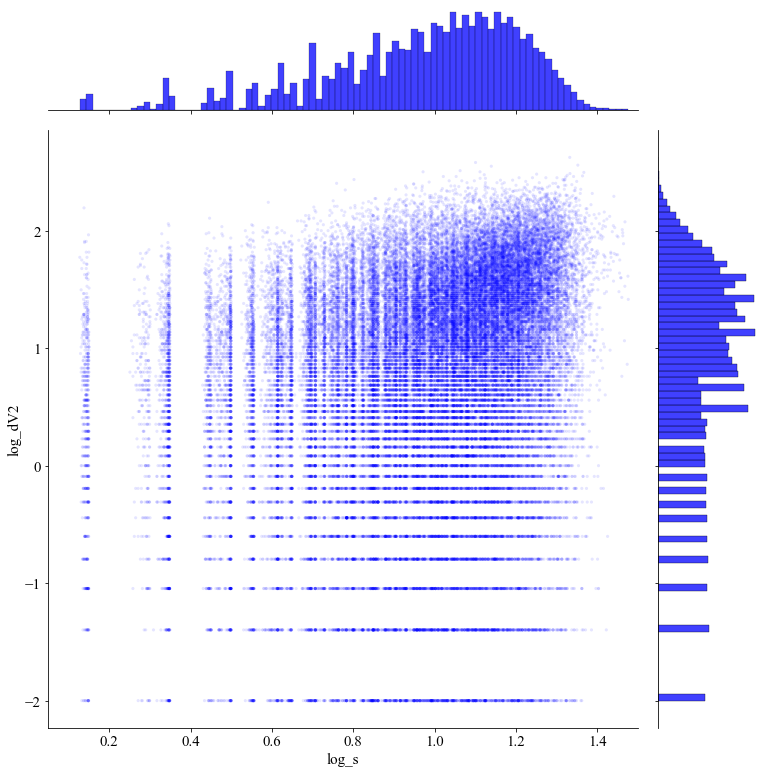

In [64]:
mask = (pairs.log_s > 0) & (pairs.log_dV2 > -4)
g = sns.jointplot(x='log_s', y='log_dV2', data=pairs[mask], alpha=0.1, s=10, edgecolor='none', color="blue", xlim=[0.05, 2.26])
g.fig.set_size_inches(12, 12)

g.ax_joint.set(
    xlim=[None, 1.5],
)

In [65]:
pairs.loc[:, 's_class'] = pd.Categorical((2*pairs.log_s + 0.1).astype('int'), ordered=True)
pairs.s_class[pairs.s_class == 0] = 1

In [66]:
for j in range(5):
    print()
    print("s_class =", j)
    print(pairs[pairs.s_class == j][['dV2', 'log_s']].describe())


s_class = 0
       dV2  log_s
count  0.0    0.0
mean   NaN    NaN
std    NaN    NaN
min    NaN    NaN
25%    NaN    NaN
50%    NaN    NaN
75%    NaN    NaN
max    NaN    NaN

s_class = 1
                dV2         log_s
count  23978.000000  23978.000000
mean      13.832179      0.717342
std       21.754725      0.202349
min        0.000000     -0.042724
25%        1.210000      0.614912
50%        5.290000      0.775536
75%       16.810000      0.875652
max      272.250000      0.949995

s_class = 2
                dV2         log_s
count  37393.000000  37393.000000
mean      25.891738      1.128121
std       35.028318      0.104436
min        0.000000      0.950221
25%        2.560000      1.043670
50%       12.250000      1.124313
75%       34.810000      1.206913
max      420.250000      1.448509

s_class = 3
              dV2      log_s
count   19.000000  19.000000
mean    52.474737   1.462263
std     34.022777   0.007783
min      5.760000   1.450098
25%     28.645000   1.456489


/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


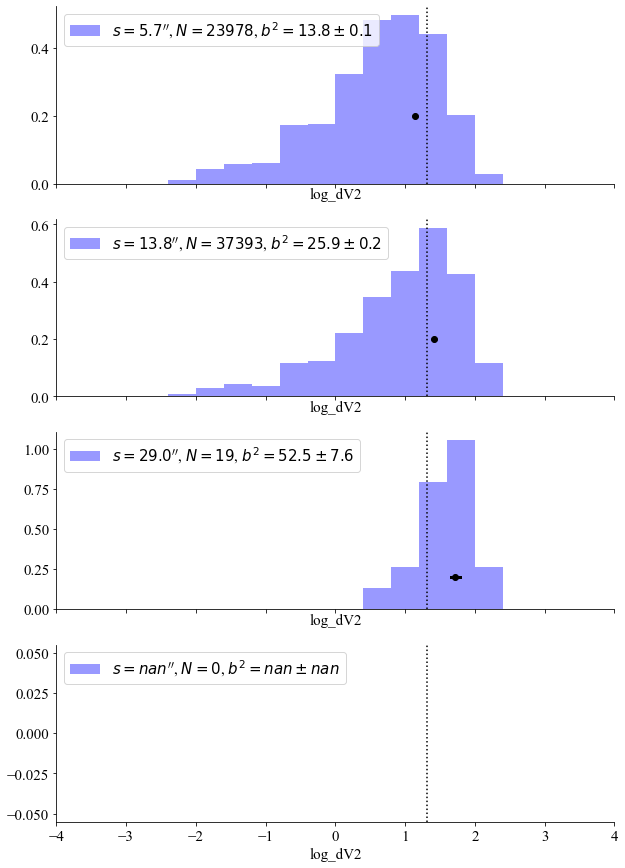

In [67]:
sig2 = pairs.dV2.mean()
sig2a = 2*np.var(df1.V)
fig, axes = plt.subplots(4, 1, figsize=(10, 15), sharex=True)
for sclass, ax in zip(range(1, 5), axes):
    b2mean = np.mean(pairs.dV2[pairs.s_class == sclass])
    b2std = np.std(pairs.dV2[pairs.s_class == sclass])
    b2mean2 = np.mean(pairs.log_dV2[pairs.s_class == sclass])
    n = np.sum(pairs.s_class == sclass)
    b2sem = b2std/np.sqrt(n)
    smean = np.mean(10**pairs.log_s[pairs.s_class == sclass])
    label = f"$s = {smean:.1f}''$"
    label += f", $N = {n}$"
    label += fr", $b^2 = {b2mean:.1f} \pm {b2sem:.1f}$"
    sns.distplot(pairs.log_dV2[pairs.s_class == sclass], 
                 norm_hist=True, kde=False, ax=ax,
                 label=label, bins=20, color="blue",hist_kws=dict(range=[-4.0, 4.0])
                )
    ax.plot([np.log10(b2mean)], [0.2], 'o', color='k')
    ax.plot([np.log10(b2mean - b2sem), np.log10(b2mean + b2sem)], [0.2]*2, lw=3, color='k')
    ax.axvline(np.log10(sig2a), color='k', ls=':')
    ax.set(xlim=[-4.0, 4.0])
    ax.legend(loc='upper left')
sns.despine()

In [47]:
print(f'Dotted line is 2 x sigma^2 = {sig2a:.2f}')

Dotted line is 2 x sigma^2 = 20.81


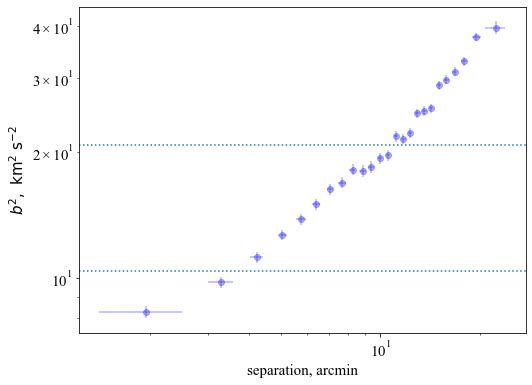

In [68]:
ngroup = 2500
groups = np.arange(len(pairs)) // ngroup
table = pairs[['s', 'dV2']].sort_values('s').groupby(groups).describe()
fig, ax = plt.subplots(figsize=(8, 6))
s = table[('s', 'mean')]
e_s = table[('s', 'std')]
b2 = table[('dV2', 'mean')]
ng = table[('dV2', 'count')]
e_b2 = table[('dV2', 'std')]/np.sqrt(ng - 1)
ax.axhline(sig2a, ls=':')
ax.axhline(0.5*sig2a, ls=':')
ax.errorbar(s, b2, yerr=e_b2, xerr=e_s, fmt='o', alpha=0.3, color="blue")
#sgrid = np.logspace(0.3, 1.65)
#ax.plot(sgrid, 38.5*sgrid**(0.8), color="k", lw=0.5)
ax.set(xscale='log', yscale='log', 
       xlabel='separation, arcmin',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$'
      )
None

In [27]:

d_log_s = 0.2
log_s_min = np.min(pairs["log_s"])
#log_s_min = 0.01
ils = ((pairs["log_s"] - log_s_min) / d_log_s).astype(int).rename("ils")
ils[ils < 0] = 0
ils


1    0      4
2    0      3
3    0      3
4    0      2
5    0      0
           ..
358  349    4
     350    4
     351    4
     352    0
     353    1
Name: ils, Length: 61390, dtype: int64

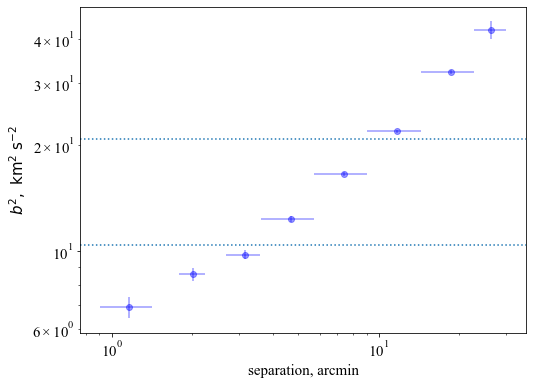

In [35]:
table = pairs[['s', 'dV2']].groupby(ils).describe()
fig, ax = plt.subplots(figsize=(8, 6))
s = 0.5 * (table[('s', 'min')] + table[('s', 'max')])
e_s = 0.5 * (table[('s', 'max')] - table[('s', 'min')])
b2 = table[('dV2', 'mean')]
ng = table[('dV2', 'count')]
e_b2 = table[('dV2', 'std')] / np.sqrt(ng)
#ax.plot(s, b2, 'o')
ax.axhline(sig2a, ls=':')
ax.axhline(0.5*sig2a, ls=':')
ax.errorbar(s, b2, yerr=e_b2, xerr=e_s, fmt='o', alpha=0.4,color="blue")
ax.set(xscale='log', yscale='log', 
       xlabel='separation, arcmin',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$'
      )
None

In [51]:
b2

ils
0     6.739420
1     8.452805
2    10.007076
3    12.638353
4    17.367990
5    23.483277
6    33.497118
7    53.704607
Name: (dV2, mean), dtype: float64

In [52]:
pc=0.12
sc=s*pc

In [53]:
table=[sc,b2,e_s,e_b2]
dfx2=pd.DataFrame(table)
dfx2=dfx2.transpose()
dfx2=dfx2.set_axis(['pc', 'S', 'ErrX', 'ErrY'], axis=1, inplace=False)
dfx2.to_csv('SFdata//Orion2.csv',mode = 'w', index=False)

In [54]:
finish=time.time()
print("Runnig time:",finish-start, "seconds" )

Runnig time: 870.4217789173126 seconds
